# **Forecasts for Product Demand**
### *Make Accurate Forecasts for Thousands of Different Products*
<br>

## **Time Series Forecasting Template**

* ### 1. Business understanding and performance metrics definition
* ### 2. Data ingestion
* ### 3. Data exploration and understanding
* ### 4. Data pre-processing and feature engineering
* ### 5. Modeling building and selection
* ### 6. Model deployment
* ### 7. Forecasting solution acceptance
<br>

# 1. Business understanding and performance metrics definition

### **Context**

The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.

### **Content**

Historical Product Demand.csv - CSV data file containing product demand for encoded product id's

### **Acknowledgements**
This dataset is all real-life data and products/warehouse and category information encoded.

### **Problem**
Is it possible to make forecasts for thousands of products (some of them are highly variable in terms of monthly demand) for the the month after next?

**Define the following forecasting aspects:**

    a) The inputs and outputs of your forecasting model
    b) Granularity level of your forecasting model
    c) Horizon of your forecasting model
    d) The endogenous and exogenous features of your forecasting model
    e) The structured or unstructured features of your forecasting model
    f) The univariate or multivariate nature of your forecasting model (The term univariate time series refers to one that consists of single observations recorded sequentially over equal time increments)
    g) Single-step or multi-step structure of your forecasting model
    h) Contiguous or noncontiguous time series values of your forecasting model

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import rcParams
import seaborn as sns

# 2. Data ingestion

In [149]:
df = pd.read_csv('Historical Product Demand.csv')

# 3. Data exploration and understanding

In [150]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [151]:
#Dimension
print("Rows: {} Columns: {}".format(df.shape[0], df.shape[1]))

Rows: 1048575 Columns: 5


In [152]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [153]:
#Change Date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [154]:
df['Order_Demand'].unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [155]:
#Change Order Demand format
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")

df['Order_Demand']=df['Order_Demand'].str.strip()
df['Order_Demand']=df['Order_Demand'].str.strip()

#Since the "()" has been removed , we could change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [156]:
df['Order_Demand'].sum()

5145333321

In [157]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [158]:
# Missing Data
#Lets check where these nulls are.
print (df.isna().sum())
print("")
print ('% of Null Dates in the Dataset: ',df.isnull().sum()[3]/df.shape[0]*100)
#There are missing values in Dates.

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

% of Null Dates in the Dataset:  1.0718355863910547


In [159]:
# Drop na's.

# Since the number of missing values are about 1%, I am taking an 'executive decision' of removing them. ;)

df.dropna(axis=0, inplace=True) # Remove all rows with na's.
df.reset_index(drop=True)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1037331,Product_1791,Whse_J,Category_006,2016-04-27,1000
1037332,Product_1974,Whse_J,Category_006,2016-04-27,1
1037333,Product_1787,Whse_J,Category_006,2016-04-28,2500
1037334,Product_0901,Whse_J,Category_023,2016-10-07,50


In [160]:
#Totals

print("Total Product Categories: {} ".format(len(df['Product_Category'].unique())))
print("Total Warehouses: {} ".format(len(df['Warehouse'].unique())))
print("Total Products: {} ".format(len(df['Product_Code'].unique())))

Total Product Categories: 33 
Total Warehouses: 4 
Total Products: 2160 


In [161]:
#Time Series Period

dates = [pd.to_datetime(date) for date in df['Date']]
dates.sort()
print("Start Date: {}".format(dates[0]))
print("Final Date: {}".format(dates[-1]))

Start Date: 2011-01-08 00:00:00
Final Date: 2017-01-09 00:00:00


In [162]:
df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1.037336e+06
unique,2160,4,33,1729,NaN
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,NaN
freq,16936,764447,470266,2075,NaN
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,4.949384e+03
std,NaN,NaN,NaN,NaN,2.907344e+04
min,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,2.000000e+01


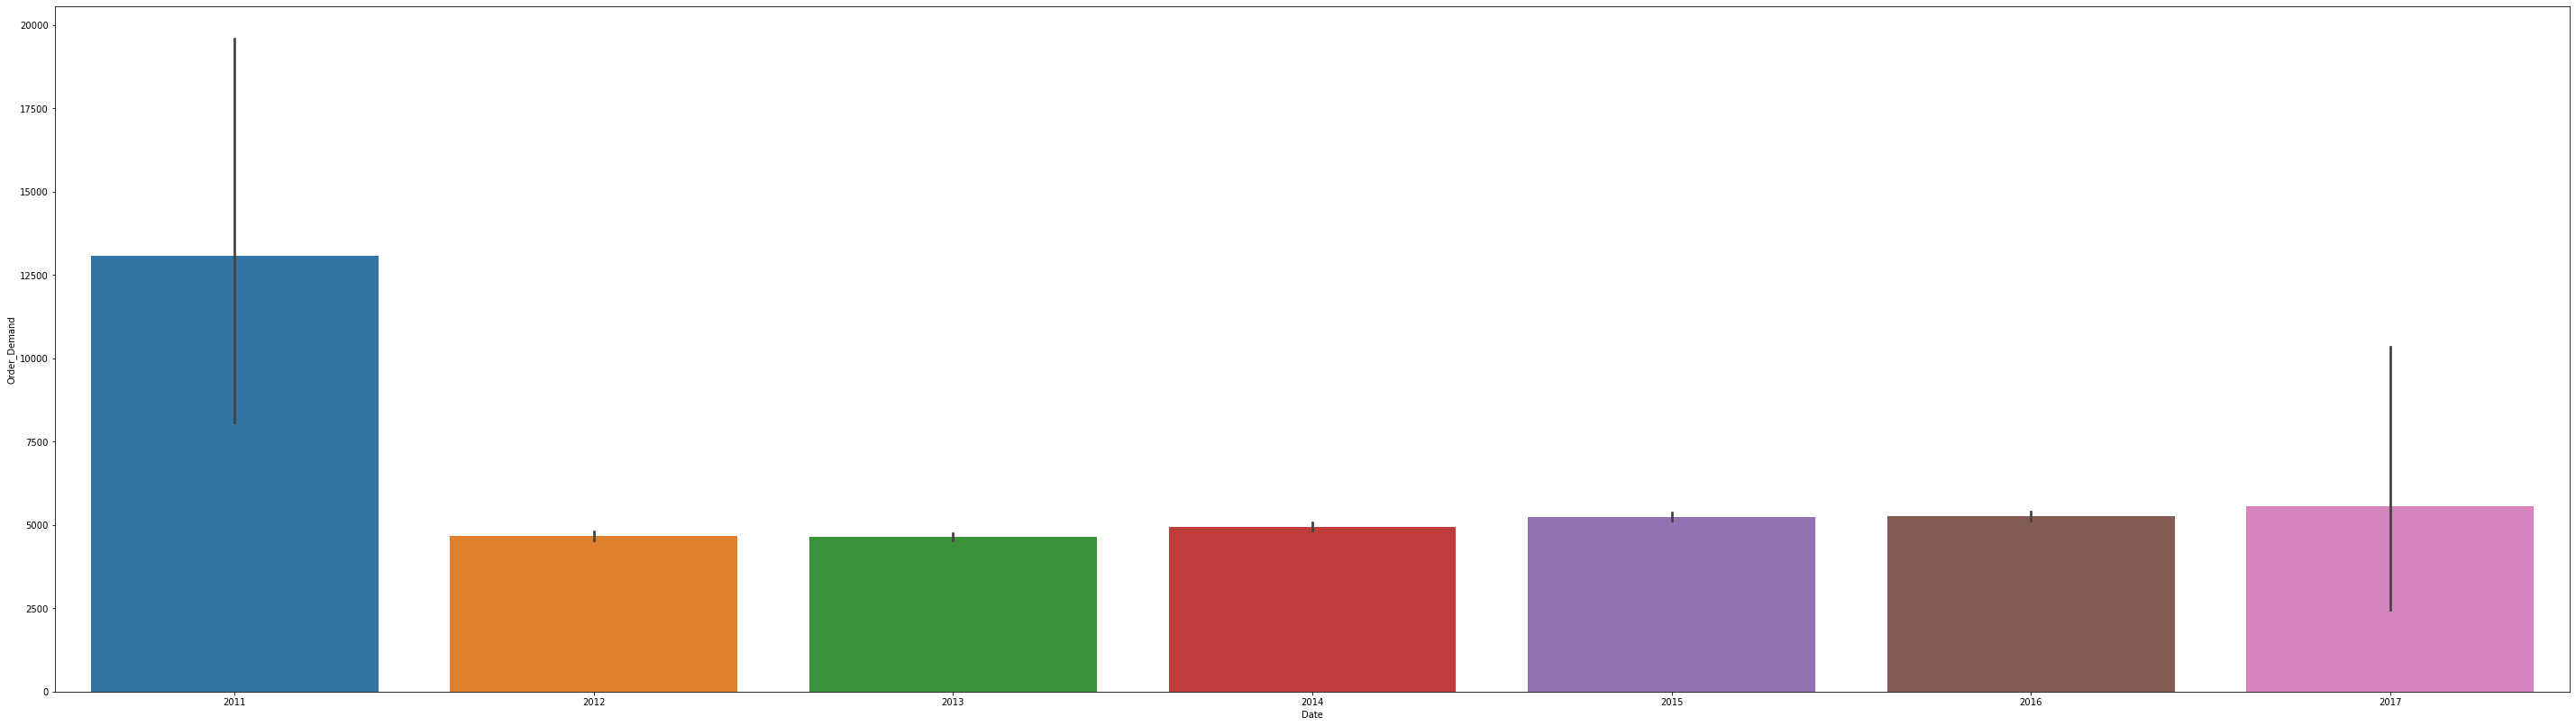

In [163]:
# Histogram / year

rcParams['figure.figsize'] = 50,14
sns.barplot(x=pd.DatetimeIndex(df['Date']).year, y=df['Order_Demand'])

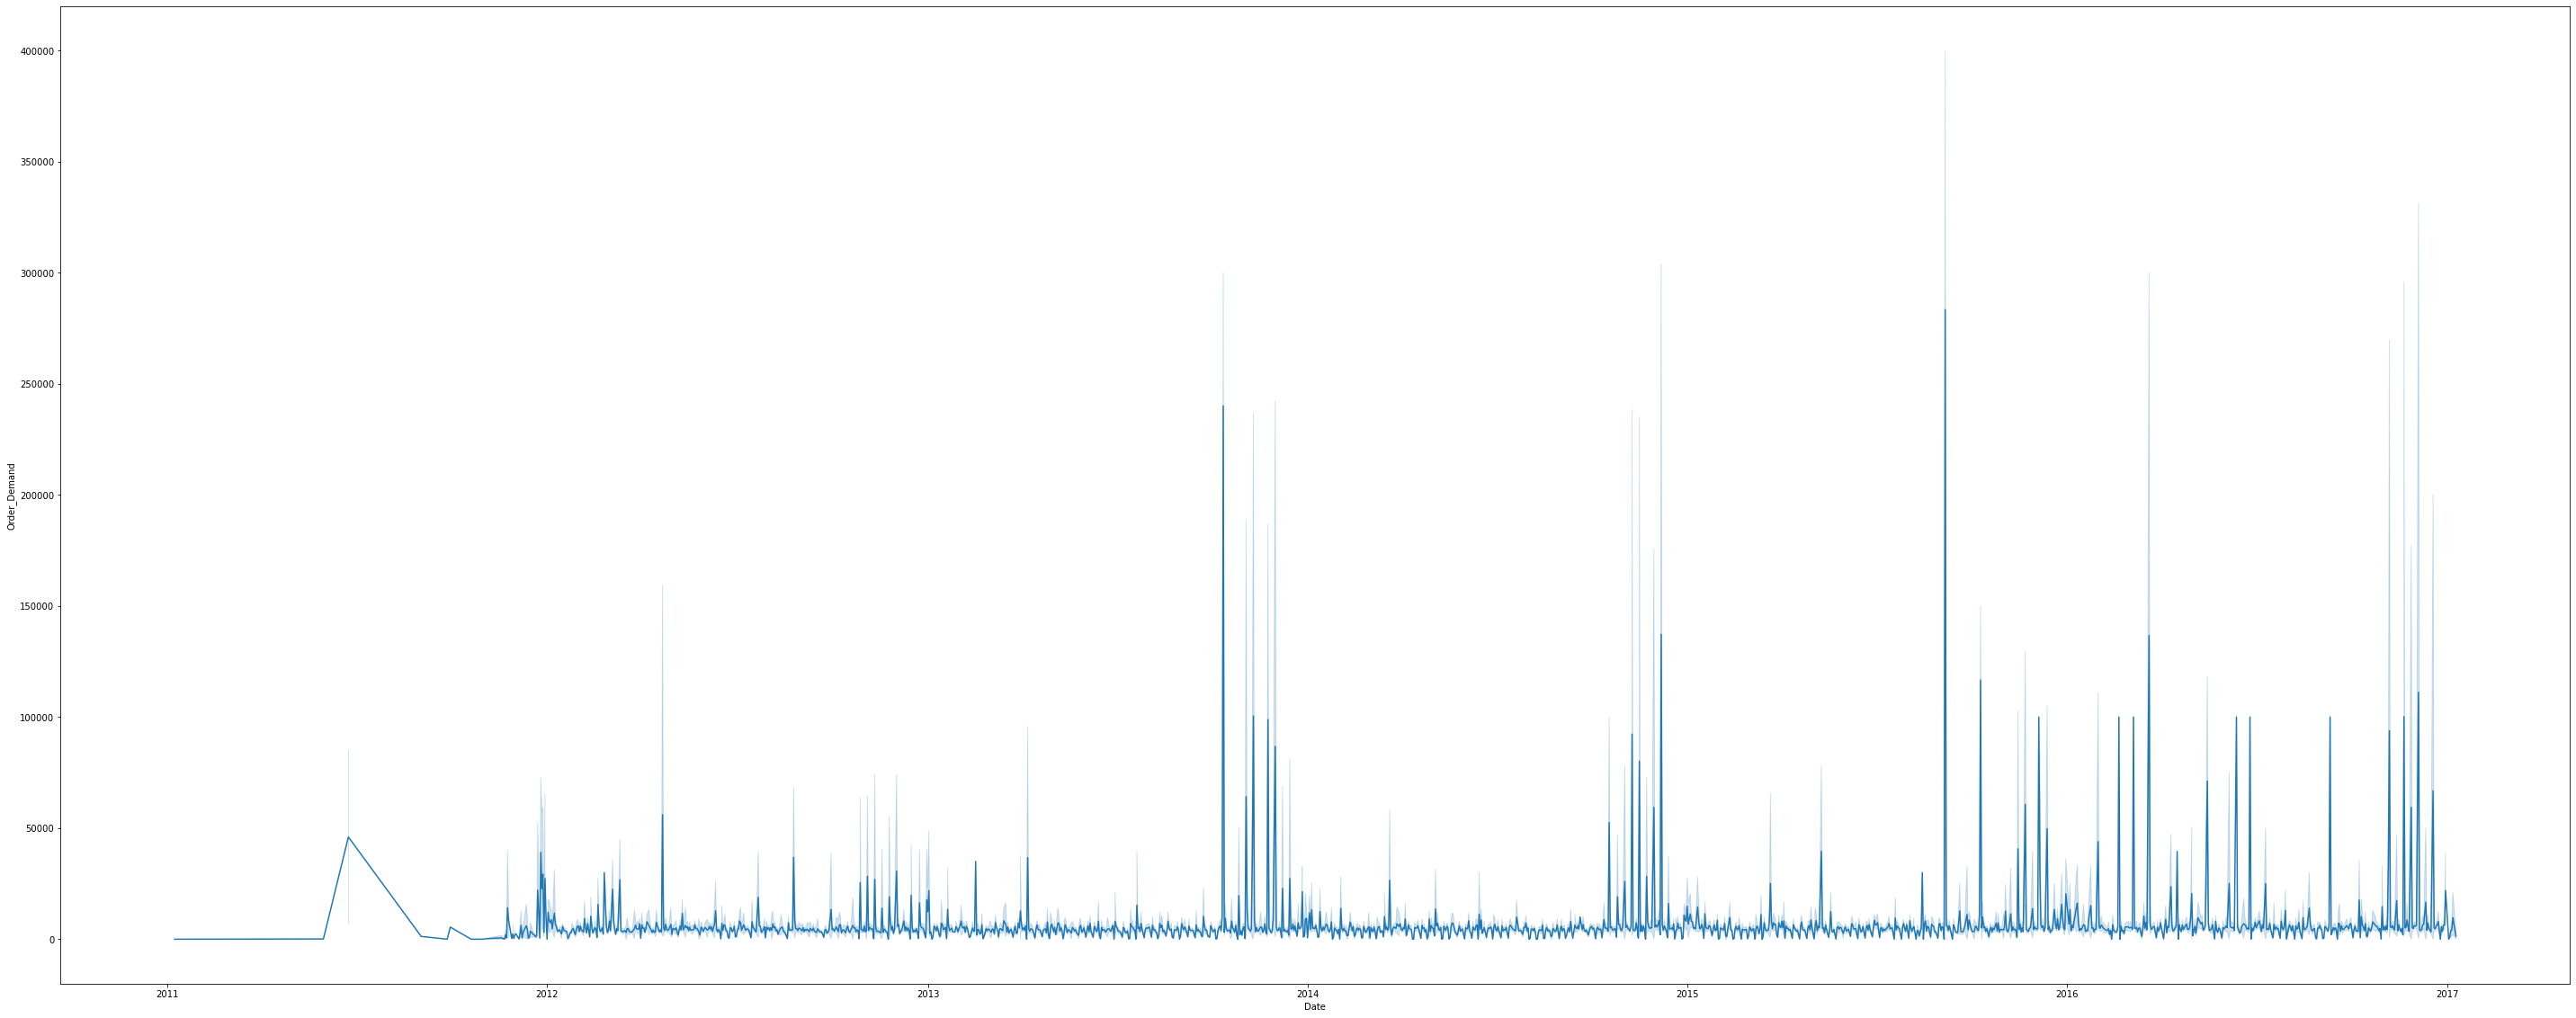

In [50]:
#Line plot / day
rcParams['figure.figsize'] = 50,20
sns.lineplot(x=df['Date'], y=df['Order_Demand'])

In [118]:
#Analizing the 2011 year
df_2011 = df[(df['Date']>='2011-01-01') & (df['Date']<='2012-01-01')].sort_values('Date', ascending=True).copy()

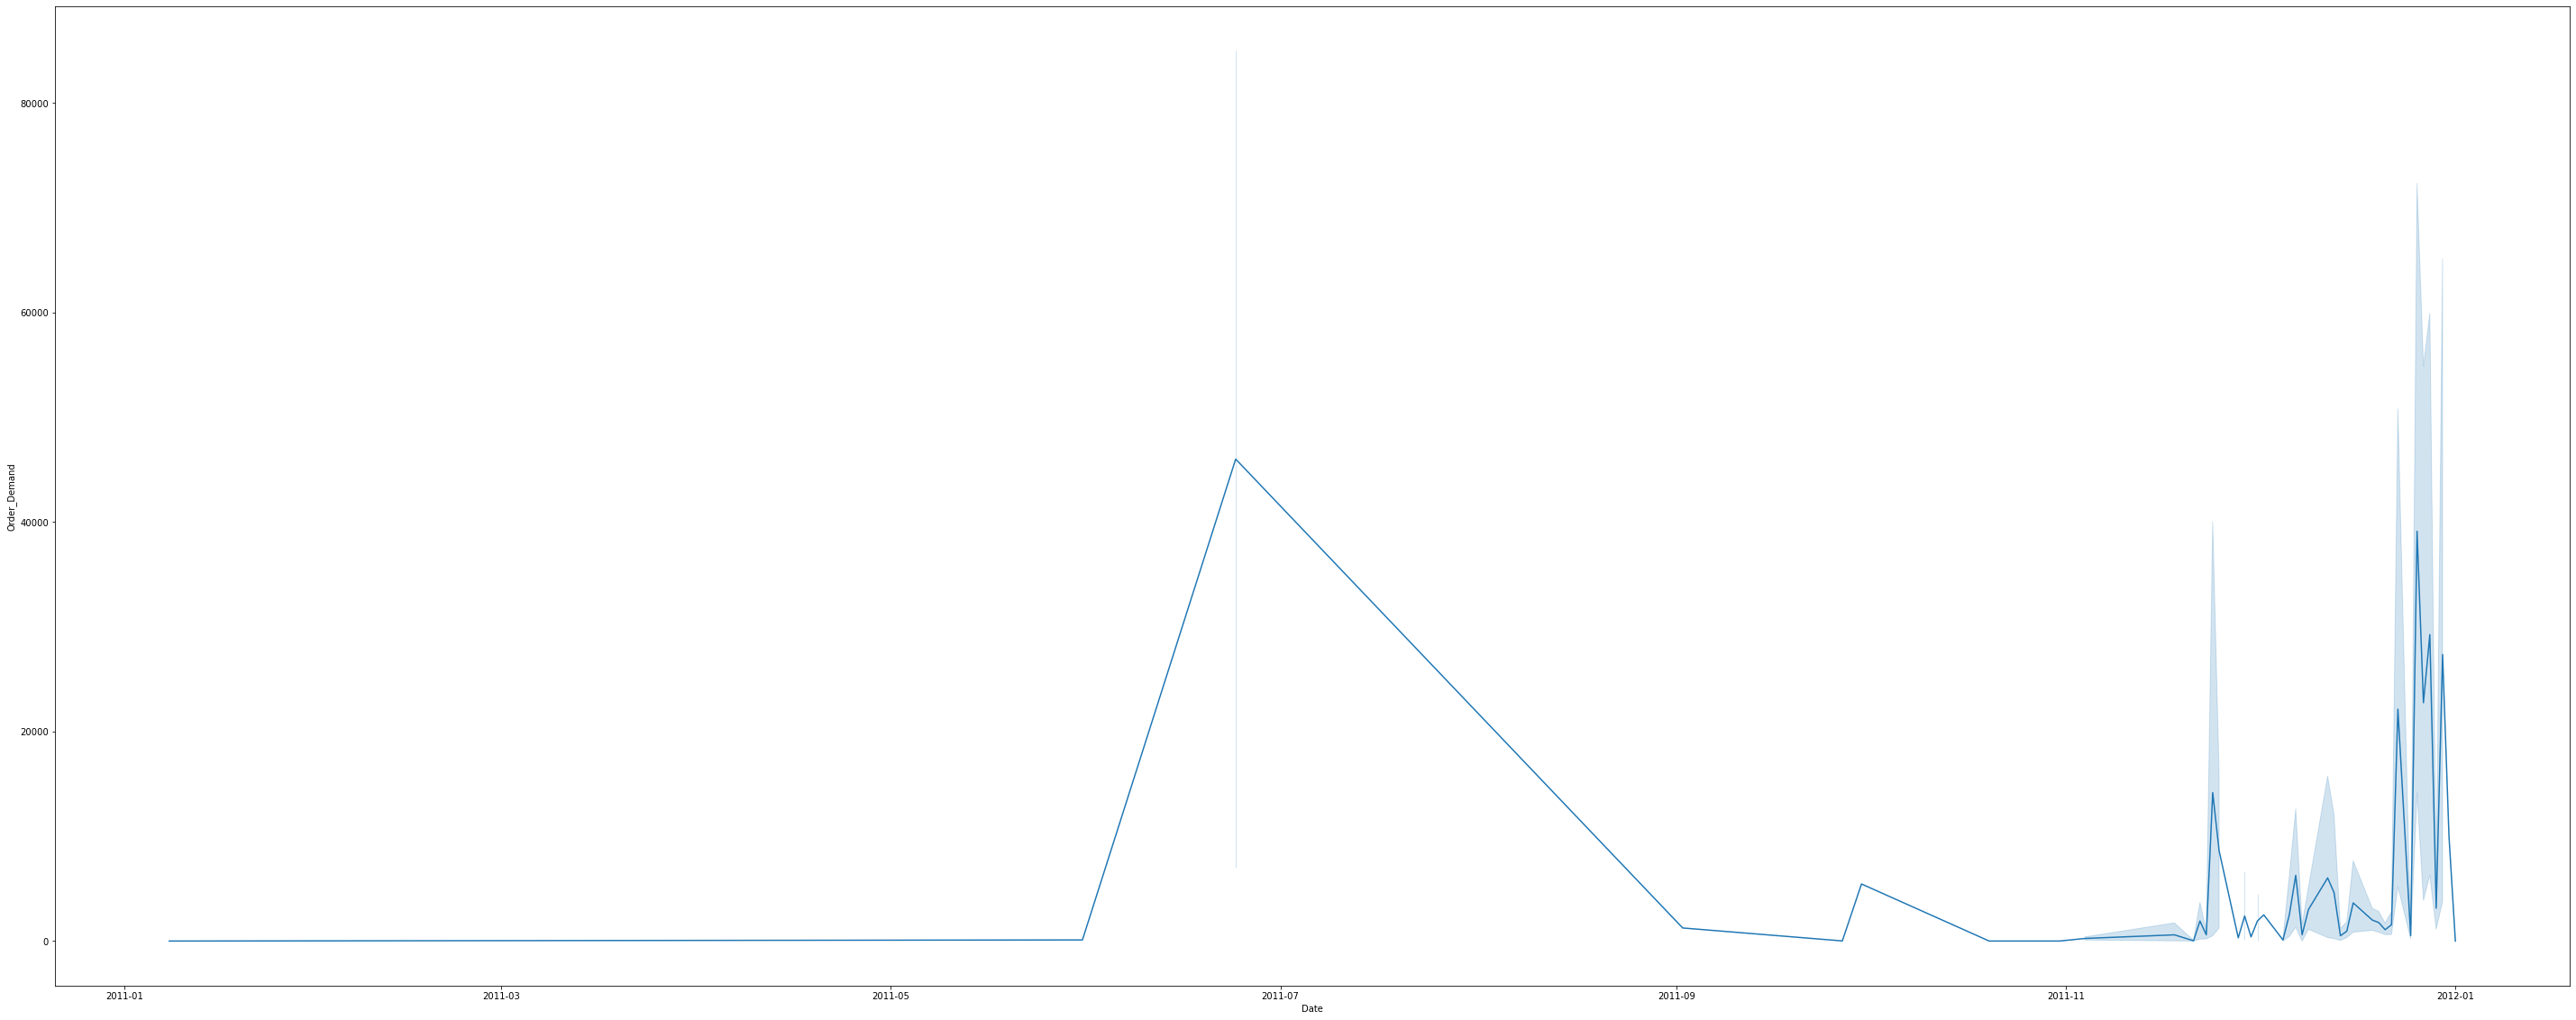

In [119]:
sns.lineplot(x=df_2011['Date'], y=df_2011['Order_Demand'])

In [136]:
#Analizing the 2017 year
df_2017 = df[(df['Date']>='2016-12-31')].sort_values('Date', ascending=True).copy()

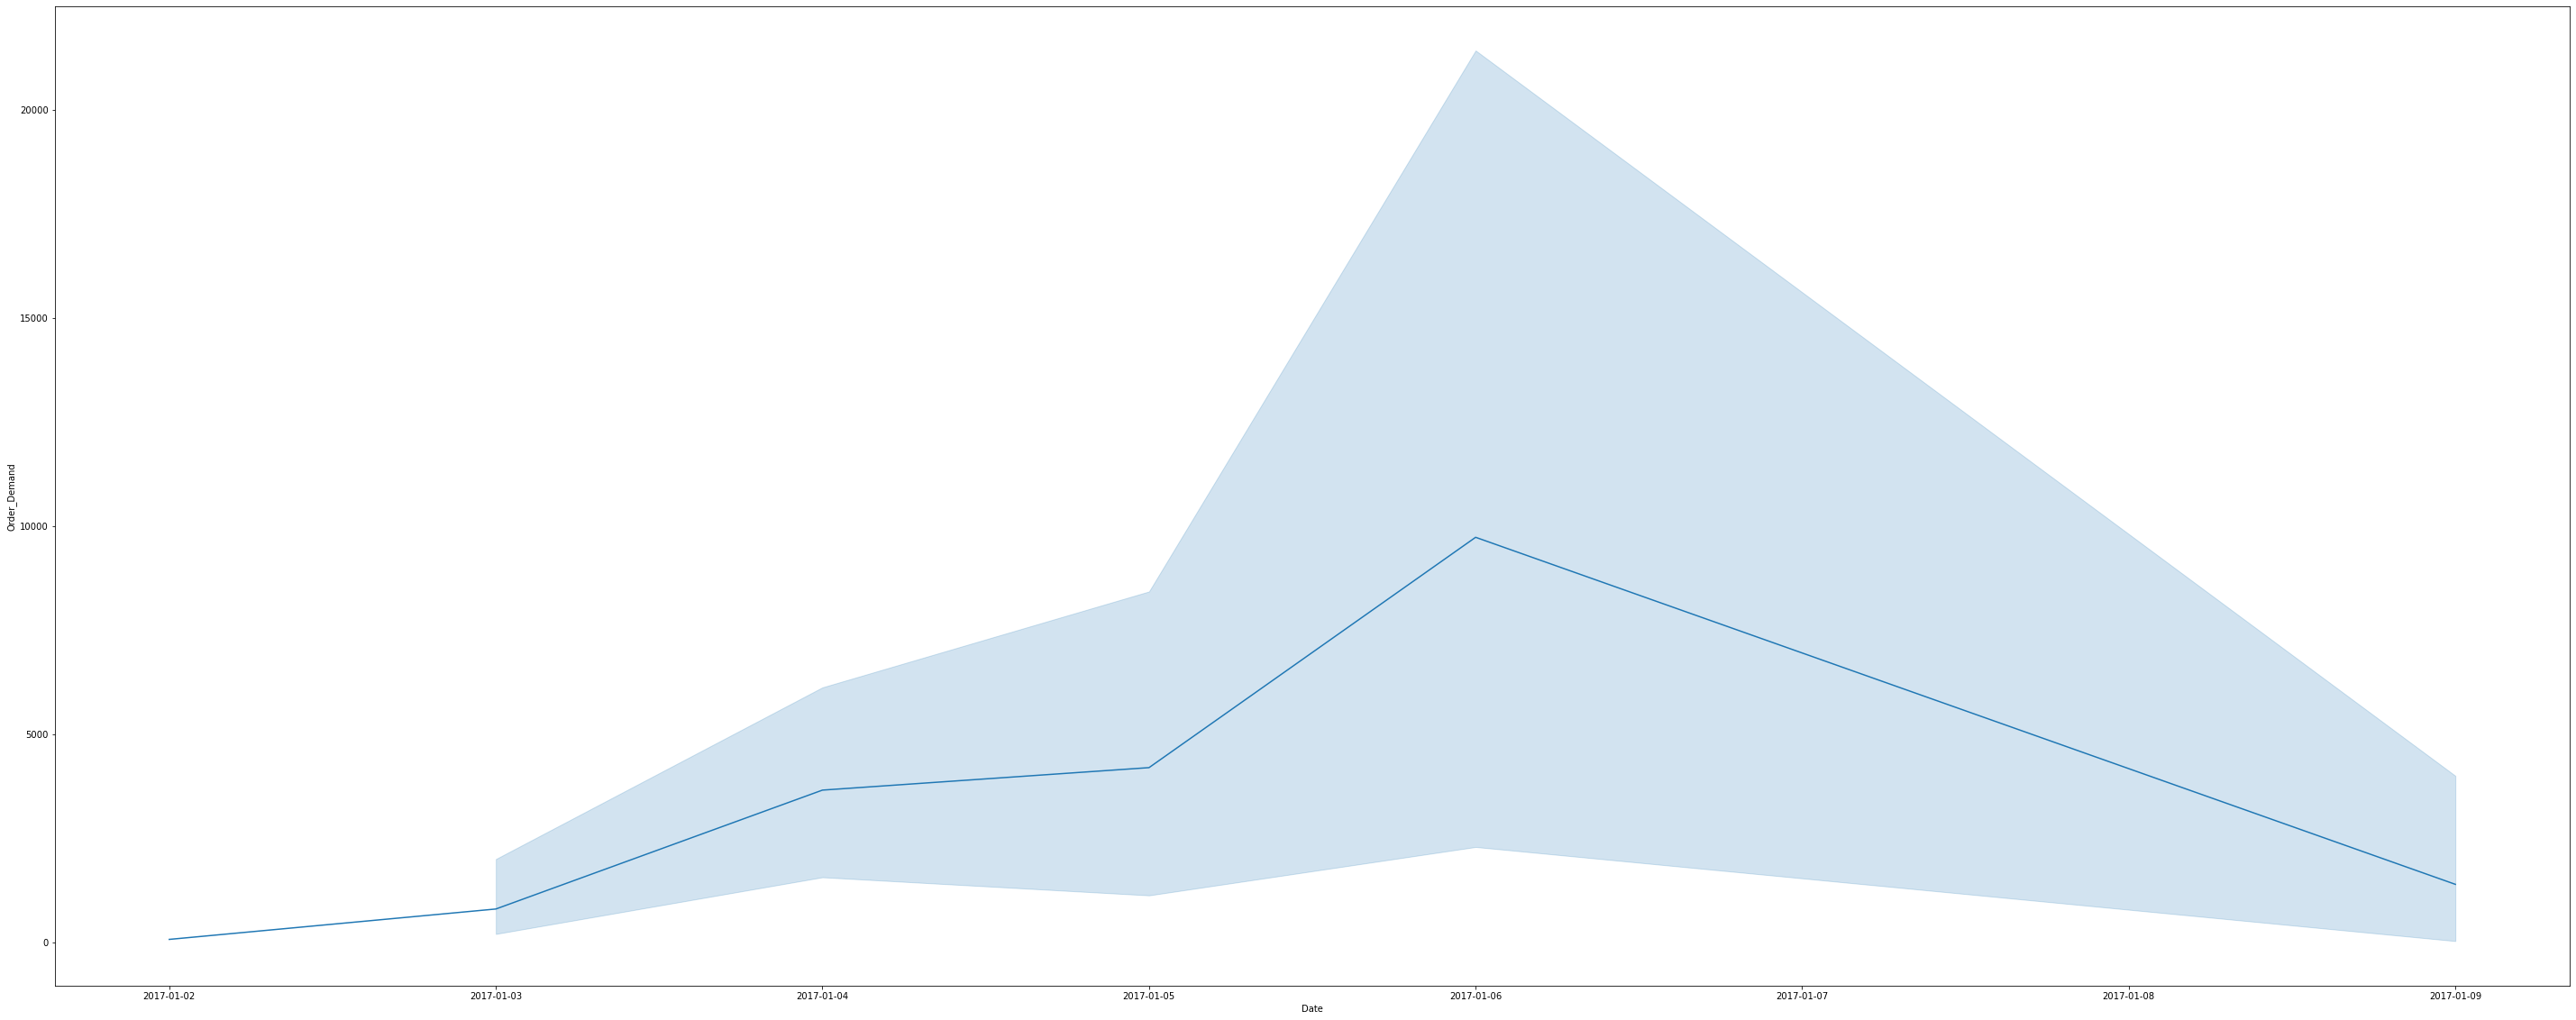

In [137]:
sns.lineplot(x=df_2017['Date'], y=df_2017['Order_Demand'])

In [165]:
#Create Year column
df['Year'] = df['Date'].dt.year

In [175]:
df_year=pd.DataFrame(df.groupby('Year')['Order_Demand'].sum())
df_year['Orders']=df['Year'].value_counts()

In [176]:
df_year

,Order_Demand,Orders
Year,,
2011,8363894,640
2012,949259991,203635
2013,1014087922,218298
2014,1071178367,216404
2015,1099398391,209661
2016,991590399,188645
2017,294967,53


In [177]:
#Lets start with 2012 and cap it 2016 december. Since the dates before 2012 have a lot of missing values - inspected and checked using basic time series plot.

df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)



In [178]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year
130870,Product_2166,Whse_S,Category_024,2012-01-01,2,2012
196928,Product_0614,Whse_S,Category_001,2012-01-02,3,2012
200087,Product_1281,Whse_S,Category_019,2012-01-02,14000,2012
200086,Product_1355,Whse_S,Category_019,2012-01-02,5000,2012
77313,Product_2169,Whse_S,Category_024,2012-01-02,55,2012


### Warehouse Analysis

In [179]:
#Warehouse shipping by orders.
df_warehouse  = pd.DataFrame()
df_warehouse['Orders']=df['Warehouse'].value_counts()
df_warehouse['Demand']=df.groupby('Warehouse')['Order_Demand'].sum()
df_warehouse['Demand/Order'] = df_warehouse['Demand'] / df_warehouse['Orders']
df_warehouse['Demand/Order']=df_warehouse['Demand/Order'].round(decimals=2)

In [180]:
df_warehouse.sort_values('Orders', ascending = False)

,Orders,Demand,Demand/Order
Whse_J,764215,3362742530,4400.26
Whse_A,142197,147646550,1038.32
Whse_S,88024,1033121811,11736.82
Whse_C,42207,582004179,13789.28


In [181]:
df_warehouse2  = df[['Year', 'Warehouse', 'Order_Demand']].groupby(['Year', 'Warehouse'], as_index=False).count()

In [182]:
df_warehouse2 = df_warehouse2.pivot(index='Year', columns='Warehouse', values='Order_Demand')

In [183]:
df_warehouse2['Total'] = df_warehouse2.sum(axis=1)

In [184]:
df_warehouse2

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S,Total
Year,,,,,
2012,28218,6889,150013,18515,203635
2013,33607,7934,156251,20506,218298
2014,28124,8187,157786,22307,216404
2015,26686,8963,153937,20075,209661
2016,25562,10234,146228,6621,188645


# 4. Data pre-processing and feature engineering